In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 数据预处理

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_flatten = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_flatten = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
x_train_normalize = x_train_flatten / 255.0
x_test_normalize = x_test_flatten / 255.0

In [6]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### 2. 建立模型

#### 2.1 建立 Sequential 模型

In [7]:
model = tf.keras.models.Sequential([
    
    # 卷积层1与池化层1
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 卷积层2与池化层2
    tf.keras.layers.Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    
    # 平坦层
    tf.keras.layers.Flatten(),
    
    # 隐藏层(128个神经元)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # 输出层
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 2.2 查看模型的摘要

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               225920    
__________

### 3. 训练模型

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2,
                         epochs=20, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 57s - loss: 0.4985 - acc: 0.8430 - val_loss: 0.0989 - val_acc: 0.9692
Epoch 2/20
 - 53s - loss: 0.1389 - acc: 0.9587 - val_loss: 0.0664 - val_acc: 0.9793
Epoch 3/20
 - 52s - loss: 0.1027 - acc: 0.9690 - val_loss: 0.0539 - val_acc: 0.9829
Epoch 4/20
 - 52s - loss: 0.0846 - acc: 0.9740 - val_loss: 0.0556 - val_acc: 0.9834
Epoch 5/20
 - 53s - loss: 0.0696 - acc: 0.9793 - val_loss: 0.0438 - val_acc: 0.9876
Epoch 6/20
 - 52s - loss: 0.0625 - acc: 0.9811 - val_loss: 0.0379 - val_acc: 0.9886
Epoch 7/20
 - 51s - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0377 - val_acc: 0.9894
Epoch 8/20
 - 51s - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 9/20
 - 52s - loss: 0.0457 - acc: 0.9867 - val_loss: 0.0394 - val_acc: 0.9889
Epoch 10/20
 - 51s - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0357 - val_acc: 0.9889
Epoch 11/20
 - 51s - loss: 0.0382 - acc: 0.9877 - val_loss: 0.0344 - val_acc: 0.9909
Epoch 12/20
 - 52s - los

### 4. 以图形显示训练过程

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

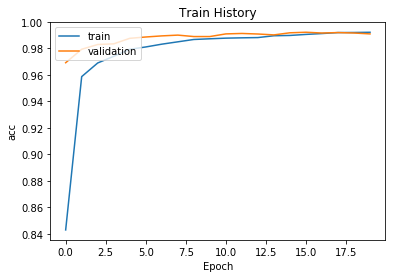

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

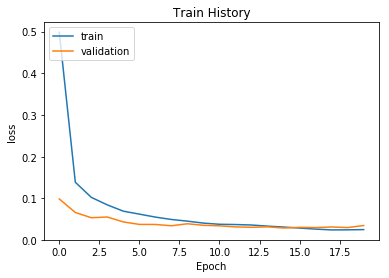

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

### 5. 评估模型的准确率

In [14]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy:', scores[1])

10000/10000 [==============================] - 5s 452us/step

accuracy: 0.9923


### 6. 进行预测

#### 6.1 执行预测

In [15]:
predictions = model.predict_classes(x_test_normalize)

#### 6.2 预测结果

In [16]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

#### 6.3 定义函数以显示10项预测结果

In [17]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 数字图像数组
    labels: 真实值数组
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'lable=' + str(labels[idx])
        if len(predictions) > 0:
            title += ',predict=' + str(predictions[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

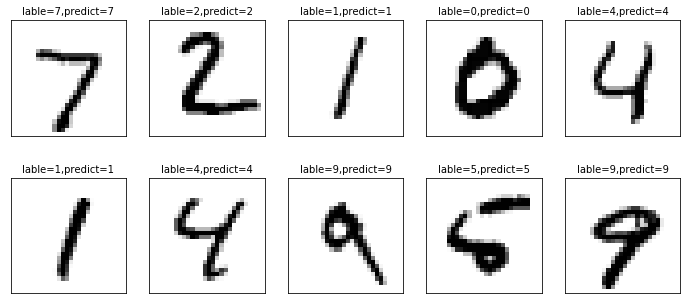

In [18]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=0, num=10)

### 7. 显示混淆矩阵

#### 7.1 建立混淆矩阵

In [19]:
pd.crosstab(y_test, predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,2,0,1025,0,1,0,0,3,1,0
3,0,0,0,1004,0,2,0,1,3,0
4,0,0,0,0,980,0,0,0,0,2
5,1,0,0,6,0,883,1,0,0,1
6,4,3,0,0,2,1,948,0,0,0
7,0,1,2,0,0,0,0,1023,1,1
8,2,1,3,0,1,1,3,2,958,3


#### 7.2 建立真实值与预测 DataFrame

In [20]:
df = pd.DataFrame({'label': y_test, 'predict': predictions})
df[:2]

,label,predict
0,7,7
1,2,2


#### 7.3 查询真实值是 "5" 但预测值是 "2" 的数据

In [21]:
df[(df.label==5)&(df.predict==2)]

,label,predict


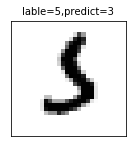

In [22]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=340, num=1)

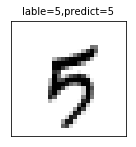

In [23]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=1289, num=1)